# install cuda library
****

In [2]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing kmeans.egg-info/PKG-INFO
writing dependency_links to kmeans.egg-info/dependency_links.txt
writing top-level names to kmeans.egg-info/top_level.txt
reading manifest file 'kmeans.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'kmeans.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_ext
cythoning wrapper.pyx to wrapper.cpp
/home/tarique/softwares/anaconda3/envs/cuda/lib/python3.8/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/tarique/projects/jupyter/practice/kmeans cuda/wrapper.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'kmeans' extension
/opt/cuda/bin/nvcc -I/home/tarique/softwares/anaconda3/envs/cuda/lib/python3.8/site-packages/numpy/core/include -I/opt/cuda/include -Isrc -I/home/tari

In [3]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.cluster import KMeans
from kmeans import kmeans#gpu library
import pylab as plt

## prepare data
****

In [4]:
df = pd.DataFrame()
n = 10000000
dim = 2
k = 4
it = 10
x = np.random.random(n * dim)
x = np.array(x, dtype='float32')
y = np.reshape(x, (n, dim), order='F')

## cpu

In [5]:
%%time

# Z = B[['x', 'y']].values
clusters1 = KMeans(n_clusters=4, random_state=0).fit(y)

CPU times: user 2min 41s, sys: 4.72 s, total: 2min 45s
Wall time: 31.7 s


## gpu

In [6]:
%%time
clusters2 = kmeans().getClusters(x, n, dim, k, clusters1.n_iter_)

CPU times: user 6.69 s, sys: 516 ms, total: 7.21 s
Wall time: 8.55 s


In [13]:
df = pd.DataFrame(data=y, columns=['x', 'y'])

In [14]:
df['C']  = clusters1.labels_

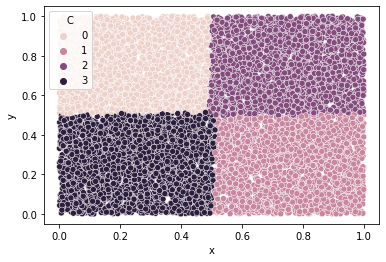

In [15]:
sns.scatterplot(data=df, x="x", y="y", hue='C')
plt.show()

In [16]:
df['C'] = clusters2

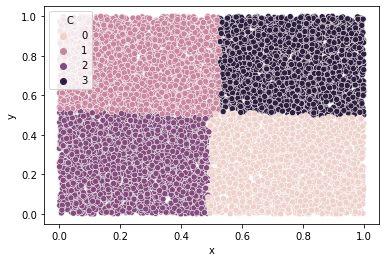

In [17]:
sns.scatterplot(data=df, x="x", y="y", hue='C')
plt.show()